# The Spark Foundation (Internship, Task 2)

**Prediction using unsupervised machine learning: Predict the optimum number of cluster for the iris data set**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first few rows of the DataFrame
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [2]:
# Generate descriptive statistics
descriptive_stats = X.describe()

# Display the descriptive statistics
print(descriptive_stats)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [3]:

# Check for null values
null_values = X.isnull().sum()

# Display the null values
print(null_values)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


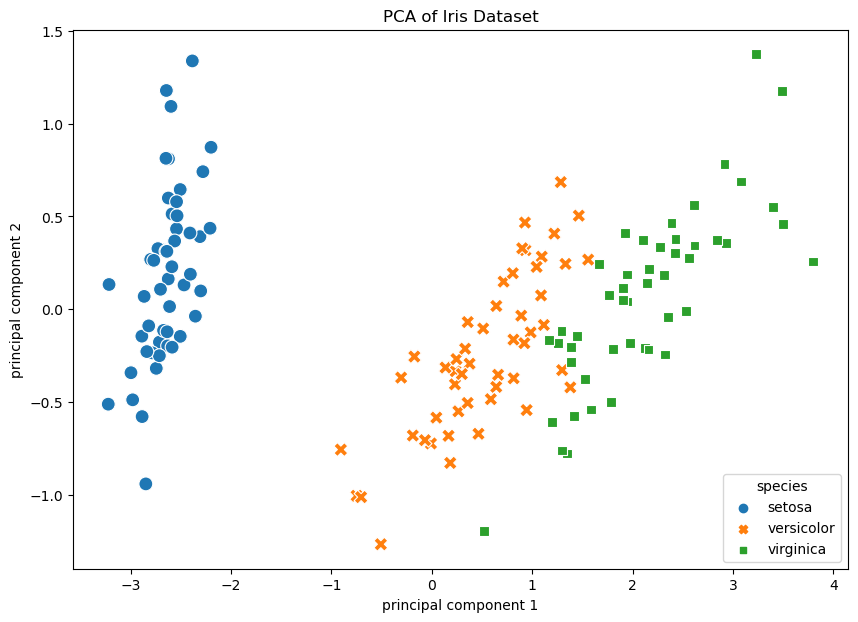

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA  # Ensure PCA is imported

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the dataset
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
pca_df = pd.concat([pca_df, y], axis=1)

# Map target integers to species names
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
pca_df['species'] = pca_df['species'].map(species_map)

# PCA plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='principal component 1', y='principal component 2', hue='species', style='species', s=100)
plt.title('PCA of Iris Dataset')
plt.show()


In [5]:
# Standardize the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\USER\Contactanaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\Contactanaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\Contactanaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\Contactanaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on 

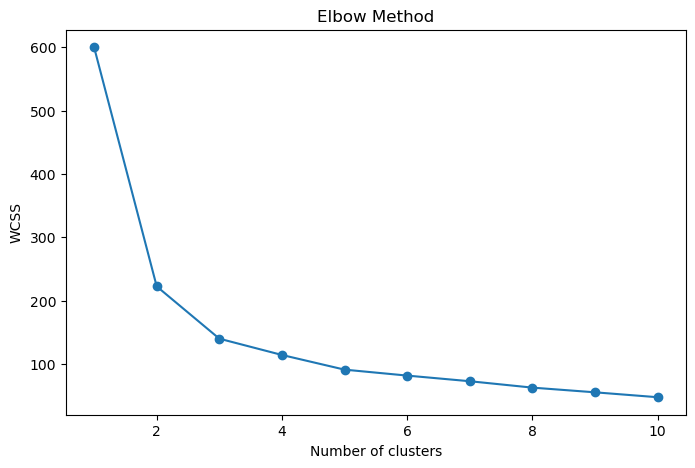

In [6]:
# Determine the Optimum Number of Clusters

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate within-cluster sum of squares for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


C:\Users\USER\Contactanaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\Contactanaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\Contactanaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\Contactanaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on 

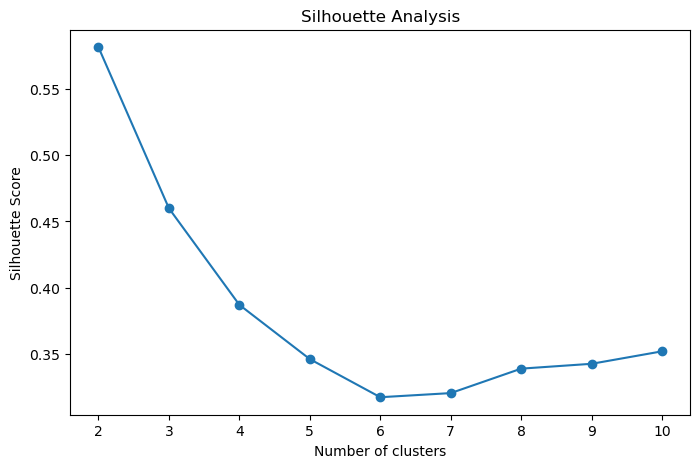

In [7]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


C:\Users\USER\Contactanaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\Contactanaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\Contactanaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\Contactanaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on 

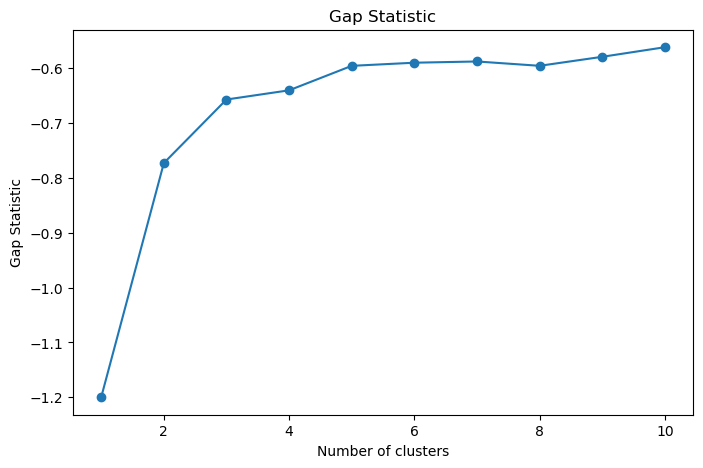

In [8]:
# Gap Statistic
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist

def gap_statistic(X, n_refs=3, max_clusters=10):
    gaps = np.zeros((max_clusters,))
    s_k = np.zeros((max_clusters,))
    for k in range(1, max_clusters + 1):
        ref_disps = np.zeros(n_refs)
        for i in range(n_refs):
            random_reference = np.random.random_sample(size=X.shape)
            km = KMeans(k)
            km.fit(random_reference)
            ref_disp = np.mean(np.min(cdist(random_reference, km.cluster_centers_, 'euclidean'), axis=1))
            ref_disps[i] = ref_disp
        km = KMeans(k)
        km.fit(X)
        orig_disp = np.mean(np.min(cdist(X, km.cluster_centers_, 'euclidean'), axis=1))
        gap = np.log(np.mean(ref_disps)) - np.log(orig_disp)
        sk = np.sqrt(np.mean((np.log(ref_disps) - np.log(np.mean(ref_disps))) ** 2))
        gaps[k-1] = gap
        s_k[k-1] = sk

    return gaps, s_k

gaps, s_k = gap_statistic(X_scaled, n_refs=5, max_clusters=10)

# Plot the Gap Statistic
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), gaps, marker='o')
plt.title('Gap Statistic')
plt.xlabel('Number of clusters')
plt.ylabel('Gap Statistic')
plt.show()
